In [1]:
from tensorflow import keras

(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [2]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


y[0] :  5


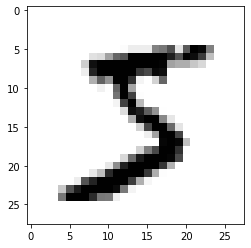

In [3]:
# 첫번째 데이터의 실제 이미지를 확인해보는 작업
import matplotlib.pyplot as plt
%matplotlib inline

print('y[0] : ', y_train[0])
plt.imshow(x_train[0], cmap='gray_r')

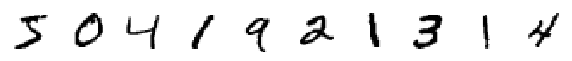

In [4]:
fig, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(10):
    ax[i].imshow(x_train[i], cmap='gray_r')
    ax[i].axis('off')
plt.show()

In [5]:
print([y_train[i] for i in range(10)])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [6]:
import numpy as np
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


### 로지스틱 회귀

In [7]:
# 데이터 전처리
x_train_scaled, x_test = x_train / 255.0, x_test / 255.0
x_train_scaled = x_train_scaled.reshape(-1, 28*28)
x_train_scaled.shape

(60000, 784)

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, x_train_scaled, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8919166666666666


### 인공신경망(ANN)

In [10]:
(train_input, train_target),(test_input, test_target) = keras.datasets.mnist.load_data()

In [11]:
train_scaled = train_input / 255.0
train_scaled = x_train_scaled.reshape(-1, 28*28)

In [12]:
# 케라스 모델 만들기
from sklearn.model_selection import train_test_split

# 검증 세트로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=.2, random_state=42)

In [13]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [14]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [15]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation='softmax', input_shape=(784,))) # 출력층(입력층을 포함)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # 다중분류 -> categorical

In [17]:
train_target[:10]

array([5, 0, 1, 6, 1, 3, 8, 8, 1, 8], dtype=uint8)

In [20]:
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.4672 - accuracy: 0.8760
Epoch 2/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.3091 - accuracy: 0.9136
Epoch 3/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.2931 - accuracy: 0.9192
Epoch 4/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.2857 - accuracy: 0.9227
Epoch 5/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.2827 - accuracy: 0.9246


In [22]:
model.evaluate(val_scaled, val_target, verbose=0)

[0.28911831811567146, 0.92258334]